<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Wheat_and_chessboard_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
wheat_list = [1] # start with one grain
for _ in range(3): #4 squares needed in total
  wheat_list.append(2 * wheat_list[-1])
print(wheat_list)

[1, 2, 4, 8]


In [4]:
import numpy as np
wheat_array = np.array(wheat_list)
print(wheat_array)

[1 2 4 8]


Reshape the array to 2*2

In [10]:
chessboard_2x2 = wheat_array.reshape((2, 2))
print(chessboard_2x2)

[[1 2]
 [4 8]]


Expansion to n * m mass

In [13]:
import numpy as np
def create_chessboard(n, m):
  num_squares = n * m
  indices_of_squares = np.arange(num_squares, dtype=np.uint64)
  board = 2**indices_of_squares
  return board.reshape(n, m)

board_8x8 = create_chessboard(8, 8)
print("8x8 Chessboard (first 4 rows):\n", board_8x8[:4, :])


8x8 Chessboard (first 4 rows):
 [[         1          2          4          8         16         32
          64        128]
 [       256        512       1024       2048       4096       8192
       16384      32768]
 [     65536     131072     262144     524288    1048576    2097152
     4194304    8388608]
 [  16777216   33554432   67108864  134217728  268435456  536870912
  1073741824 2147483648]]


Total number of wheat and bar chart

Total number of wheat on the 8x8 board: 18446744073709551615
Average number of wheat per column: [9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


<function matplotlib.pyplot.show(close=None, block=None)>

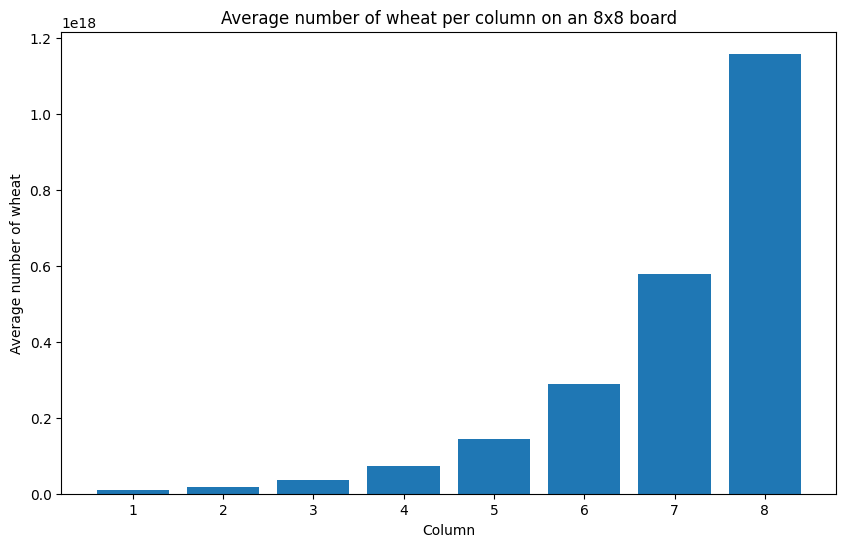

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assume board_8x8 is the 8x8 array from the above array
total_wheat = np.sum(board_8x8)
column_averages = board_8x8.mean(axis=0)

print("Total number of wheat on the 8x8 board:", total_wheat)
print("Average number of wheat per column:", column_averages)

plt.figure(figsize=(10, 6))
plt.xlabel("Column")
plt.ylabel("Average number of wheat")
plt.title("Average number of wheat per column on an 8x8 board")
plt.bar(np.arange(1, 9), column_averages)
plt.show

Heat Map of the number of wheat

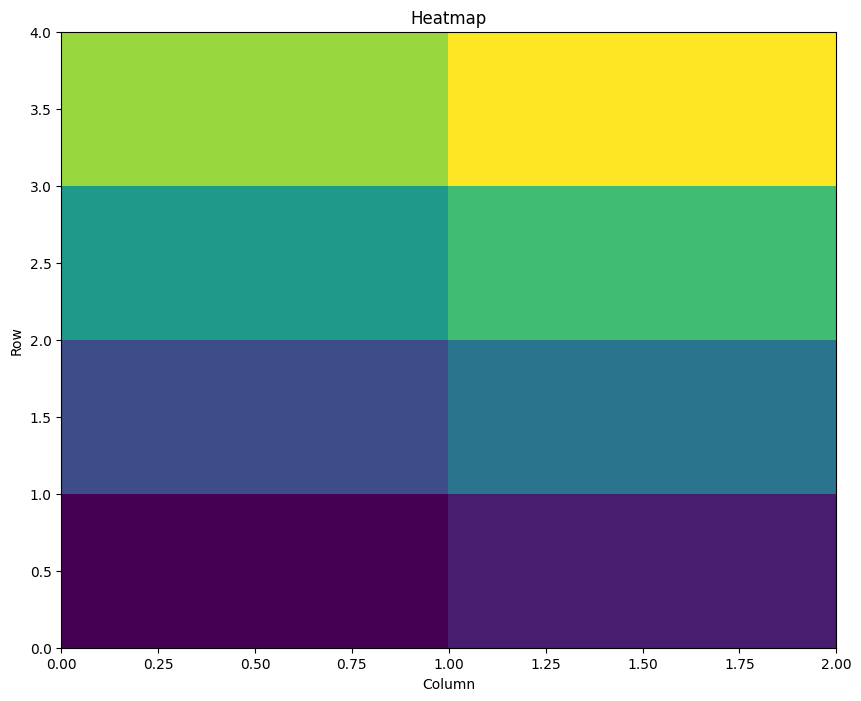

In [21]:
# Assume that board_8x8 is the 8x8 array above

plt.figure(figsize=(10, 8))
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7,9, 11, 13]).reshape(4, 2))
plt.show()

How many times is the second half as long as the first half

In [22]:
# Assume board_8x8 is the 8x8 array above

first_half = board_8x8[0:4, :]
second_half = board_8x8[4:8, :]

sum_first_half = first_half.sum()
sum_second_half = second_half.sum()
ratio = sum_second_half / sum_first_half

print("Sum of wheat in the first half:", sum_first_half)
print("Sum of wheat in the second half:", sum_second_half)
print(f"The second half is {ratio: .0f} times larger than the first half.")

Sum of wheat in the first half: 4294967295
Sum of wheat in the second half: 18446744069414584320
The second half is  4294967296 times larger than the first half.


Other Calculation Methods

In [42]:
n_squares = 64
board_ndarray = np.array([1], dtype=np.uint64)
for _ in range(n_squares -1):
  board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1])
print("Arrange wheat on a plate of 64 squares (ndarray): {}".format(board_ndarray))

Arrange wheat on a plate of 64 squares (ndarray): [                  1                   2                   4
                   8                  16                  32
                  64                 128                 256
                 512                1024                2048
                4096                8192               16384
               32768               65536              131072
              262144              524288             1048576
             2097152             4194304             8388608
            16777216            33554432            67108864
           134217728           268435456           536870912
          1073741824          2147483648          4294967296
          8589934592         17179869184         34359738368
         68719476736        137438953472        274877906944
        549755813888       1099511627776       2199023255552
       4398046511104       8796093022208      17592186044416
      35184372088832      703687441

Using Broadcasting

In [41]:
n_squares = 64
indices_of_squares = np.arange(n_squares, dtype=np.uint64)
board_ndarray = 2**indices_of_squares
print("Number of wheat in the last square (ndarray): {}".format(board_ndarray))

Number of wheat in the last square (ndarray): [                  1                   2                   4
                   8                  16                  32
                  64                 128                 256
                 512                1024                2048
                4096                8192               16384
               32768               65536              131072
              262144              524288             1048576
             2097152             4194304             8388608
            16777216            33554432            67108864
           134217728           268435456           536870912
          1073741824          2147483648          4294967296
          8589934592         17179869184         34359738368
         68719476736        137438953472        274877906944
        549755813888       1099511627776       2199023255552
       4398046511104       8796093022208      17592186044416
      35184372088832      7036874417766

Comparing Calculation Time

In [46]:
import numpy as np
import time

# Function 1: Append method
def board_append(n_squares):
    board = np.array([1], dtype=np.uint64)
    for _ in range(n_squares - 1):
        board = np.append(board, 2 * board[-1])
    return board

# Function 2: Broadcast method
def board_broadcast(n_squares):
    indices = np.arange(n_squares, dtype=np.uint64)
    board = 2 ** indices
    return board

#Timing function
def time_function(func, *args):
  start_time = time.time()
  func(*args)
  end_time = time.time()
  return end_time - start_time

# Comparing execution time
n_squares = 64

# Timing the broadcast method
broadcast_time =time_function(board_broadcast, n_squares)
print(f"Broadcast method took: {broadcast_time: .6f} seconds")

# Timing the append method
append_time = time_function(board_append, n_squares)
print(f"Append method took: {append_time: .6f} seconds")

Broadcast method took:  0.002155 seconds
Append method took:  0.000526 seconds


Alternative way of comparing the time taken by the broadcast and append methods

In [48]:
def board_append(n):
    board = np.array([1], dtype=np.uint64)
    for _ in range(n - 1):
        board = np.append(board, 2 * board[-1])
    return board

def board_broadcast(n):
    return 2 ** np.arange(n, dtype=np.uint64)

print("Append method:")
%timeit board_append(64)

print("Broadcast method:")
%timeit board_broadcast(64)

Append method:
233 µs ± 7.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Broadcast method:
2.19 µs ± 90.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
